In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import json

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\skybl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('data.csv')
df = df[['title', 'tag', 'body']]
# convert to unicode
df['title'] = df['title'].astype(str)
df['tag'] = df['tag'].astype(str)
df['body'] = df['body'].astype(str)
df.head()

,title,tag,body
0,What is the strangest movie or short film you ...,Discussion,The more obscure the better. Films that are ju...
1,"Am I insane, or does it sound like Tom Hanks i...",Discussion,This is the trailer I'm talking about: [https:...
2,"Glen Powell, Anthony Mackie and Laura Dern to ...",News,nan
3,Characters appearances or the actors,Discussion,When you watch a movie about a fictional chara...
4,New poster for 'GOOD ONE',Poster,nan


In [3]:
stop_words = stopwords.words('english')

# remove null values
df = df.dropna()
df.isnull().sum()

# combine title, tag and body text
documents = df['tag'] + ' on ' + df['title'] + ' ' + df['body']

# remove special characters and convert text to lower case
documents = documents.str.replace('[^a-zA-Z]', ' ')
documents = documents.str.lower()

# tokenization
documents = documents.str.split()

# remove stop-words
tokenized_doc = documents.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(tokenized_doc)):
    if i in tokenized_doc:
        t = ' '.join(tokenized_doc[i])
        detokenized_doc.append(t)
print(detokenized_doc)

['discussion strangest movie short film ever seen? obscure better. films just... weird. keeping fairly vague. necessarily mean disturbing creepy though table too. mean shocking provocative, though welcome too. looking films unsettling strange number reasons. bonus points weirdness intentional due strange choices director, weird highly unconventional content/techniques rather intentional plot elements. good example anything jodorowsky. man master weird. films weird content standpoint also intrinsic standpoint, composition giving creeps. weirdest films ever seen?', 'discussion insane, sound like tom hanks one yelling "time stop!" megalopolis trailer? trailer i\'m talking about: [https://youtu.be/1kk75ueq7sc?si=hgwlmcxvg9qowfd0](https://youtu.be/1kk75ueq7sc?si=hgwlmcxvg9qowfd0) 1m14s, somone heard screaming "time stop!". they\'re words spoken entire trailer, think stands much. sounds exactly like tom hanks. put credits? cast already stacked (dustin fucking hoffman credited, jon voight, me

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf vectorizer of scikit learn
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000, use_idf = True, ngram_range=(1,10))
X = vectorizer.fit_transform(detokenized_doc)
print(X.shape) # check shape of the document-term matrix
terms = vectorizer.get_feature_names_out()

(3524, 5000)


In [7]:
from sklearn.cluster import KMeans
num_clusters = 15
km = KMeans(n_clusters=num_clusters)
km.fit(X)
clusters = km.labels_.tolist()

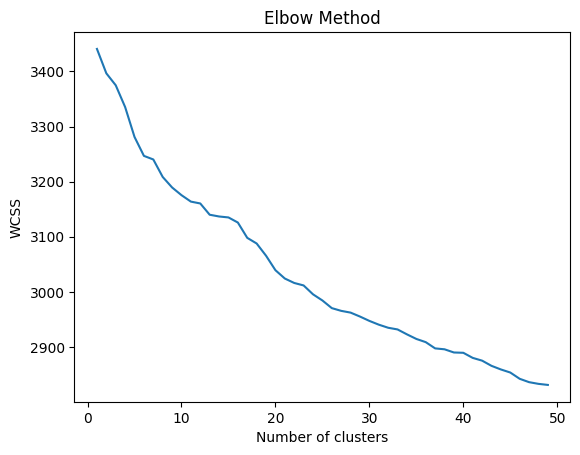

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, max_iter=100000, random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot elbow method
plt.plot(range(1, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# applying lsa //////////////////////////////

from sklearn.utils.extmath import randomized_svd
U, Sigma, VT = randomized_svd(X, n_components=10, n_iter=100,
                              random_state=122)
#printing the concepts
for i, comp in enumerate(VT):
        terms_comp = zip(terms, comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
        print("Concept "+str(i)+": ")
        for t in sorted_terms:
            print(t[0])
        print(" ")

Concept 0: 
nan
behind scenes
scenes
behind
set
nan behind
nan behind scenes
 
Concept 1: 
behind scenes
behind
scenes
nan behind
nan behind scenes
nan
scenes nan
 
Concept 2: 
domestic
domestic domestic
behind scenes
behind
scenes
estimated
locations
 
Concept 3: 
nan
set
easter
easter egg
egg
news
industry news
 
Concept 4: 
easter
easter egg
egg
2022
scenes
behind scenes
behind
 
Concept 5: 
news
industry
industry news
easter
easter egg
egg
behind scenes
 
Concept 6: 
trailer
official
official trailer
trailer trailer
trailer nan
theaters
june
 
Concept 7: 
box office
box
office
https
amp
japan
com
 
Concept 8: 
prop
costume
prop costume
comments nan
comments
foreshadowing
2022
 
Concept 9: 
foreshadowing
comments nan
comments
explanation comments
explanation comments nan
explanation
2022
 


c:\Users\skybl\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\skybl\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


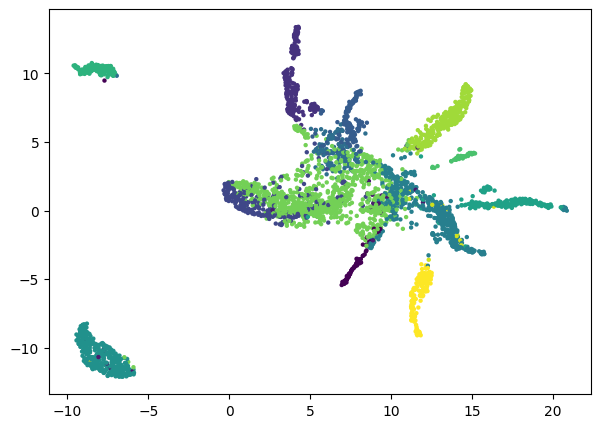

In [9]:
# import umap
import umap.umap_ as umap

X_topics=U*Sigma
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=12).fit_transform(X_topics)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = clusters,
s = 10, # size
edgecolor='none'
)
plt.show()